## Plot to exaine the trend in high temperatures over the last 70 years in Phoenix AZ

October 2024 SWD challenge

Dataset - https://www.ncdc.noaa.gov/cdo-web/

In [9]:
import pandas as pd
import altair as alt
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [2]:
# read in data
temperatures = pd.read_csv('phx_high_temperatures.csv')
temperatures_1954_1993 = pd.read_csv('phx_high_temperatures_1954_1993.csv')
temperatures = pd.concat([temperatures, temperatures_1954_1993])
# convert to time format
temperatures.DATE = pd.to_datetime(temperatures.DATE)

temperatures.head()

STATION                    NAME       DATE  TMAX
0  USW00023183  PHOENIX AIRPORT, AZ US 1994-01-01    70
1  USW00023183  PHOENIX AIRPORT, AZ US 1994-01-02    70
2  USW00023183  PHOENIX AIRPORT, AZ US 1994-01-03    73
3  USW00023183  PHOENIX AIRPORT, AZ US 1994-01-04    78
4  USW00023183  PHOENIX AIRPORT, AZ US 1994-01-05    68

### Create bar charts for categories of temperature

In [3]:
bar_chart_over_threshold_110 = alt.Chart(temperatures, width=50, height=600).mark_bar(color='darkgrey').encode(
alt.X("count(TMAX):Q", axis=alt.Axis(grid=False, title='Days >110°'), scale=alt.Scale(domain=[0, 70])),
alt.Y('year(DATE):T', axis=alt.Axis(labels=False, title=None, ticks=False, grid=False, domain=False))
).transform_filter(
    alt.datum.TMAX > 110
)

In [4]:
bar_chart_over_threshold_100 = alt.Chart(temperatures, width=100, height=600).mark_bar(color='lightgrey').encode(
alt.X("count(TMAX):Q", axis=alt.Axis(grid=False, title='Days >100°')),
alt.Y('year(DATE):T', axis=alt.Axis(labels=False, title=None, ticks=False, grid=False, domain=False))
).transform_filter(
    alt.datum.TMAX > 100
)

In [10]:
alt.concat(bar_chart_over_threshold_100,
    bar_chart_over_threshold_110, spacing=3)

alt.ConcatChart(...)

### Create heatmap plot

In [6]:
lasagna_plot = alt.Chart(temperatures, width=500, height=600).mark_rect().encode(
alt.X("monthdate(DATE):O", axis=alt.Axis(ticks=False, format='%B', title=None, labelFontSize=12)),
    alt.Y('year(DATE):T', axis=alt.Axis(title=None, labelFontSize=12)),
    alt.Color('TMAX:Q', scale=alt.Scale(scheme='redyellowblue', reverse=True), title='°F')
)

In [7]:
# create text to explain gap in data since the year hasn't finished yet
text_df = pd.DataFrame({'DATE': ['2024-11-10']})

arrow = alt.Chart(text_df).mark_text(text='→', fontSize=20, dx=15, dy=-4).encode(
    alt.X("monthdate(DATE):O", axis=alt.Axis(ticks=False, title=None)), 
    alt.Y('year(DATE):T', title=None))

text_df = pd.DataFrame({'DATE': ['2024-10-25']})

text = alt.Chart(text_df).mark_text(text='Today', fontSize=10, dx=10, dy=-4).encode(
    alt.X("monthdate(DATE):O", axis=alt.Axis(ticks=False, title=None)), 
    alt.Y('year(DATE):T', title=None))

In [11]:
# create title 
title=alt.Title(
       '70 YEARS OF DAILY HIGH TEMPERATURES (PHOENIX AZ)',
)

# create final plot by combing heatmap plot and bar plots
alt.concat(
    (lasagna_plot + text + arrow),
    alt.concat(bar_chart_over_threshold_100,
    bar_chart_over_threshold_110, spacing=1),
    spacing=3
).properties(
    title=title,
    padding=13).configure_title(
    font='Arial',
    fontSize=16,
    anchor='middle',
    align='center'
).configure_legend(
    titleFontSize=14,
    symbolOffset=100, 
    labelOffset=100,
    labelFontSize=11,
orient='left').resolve_scale(
    y='shared').display(
    scaleFactor=2
)

alt.ConcatChart(...)

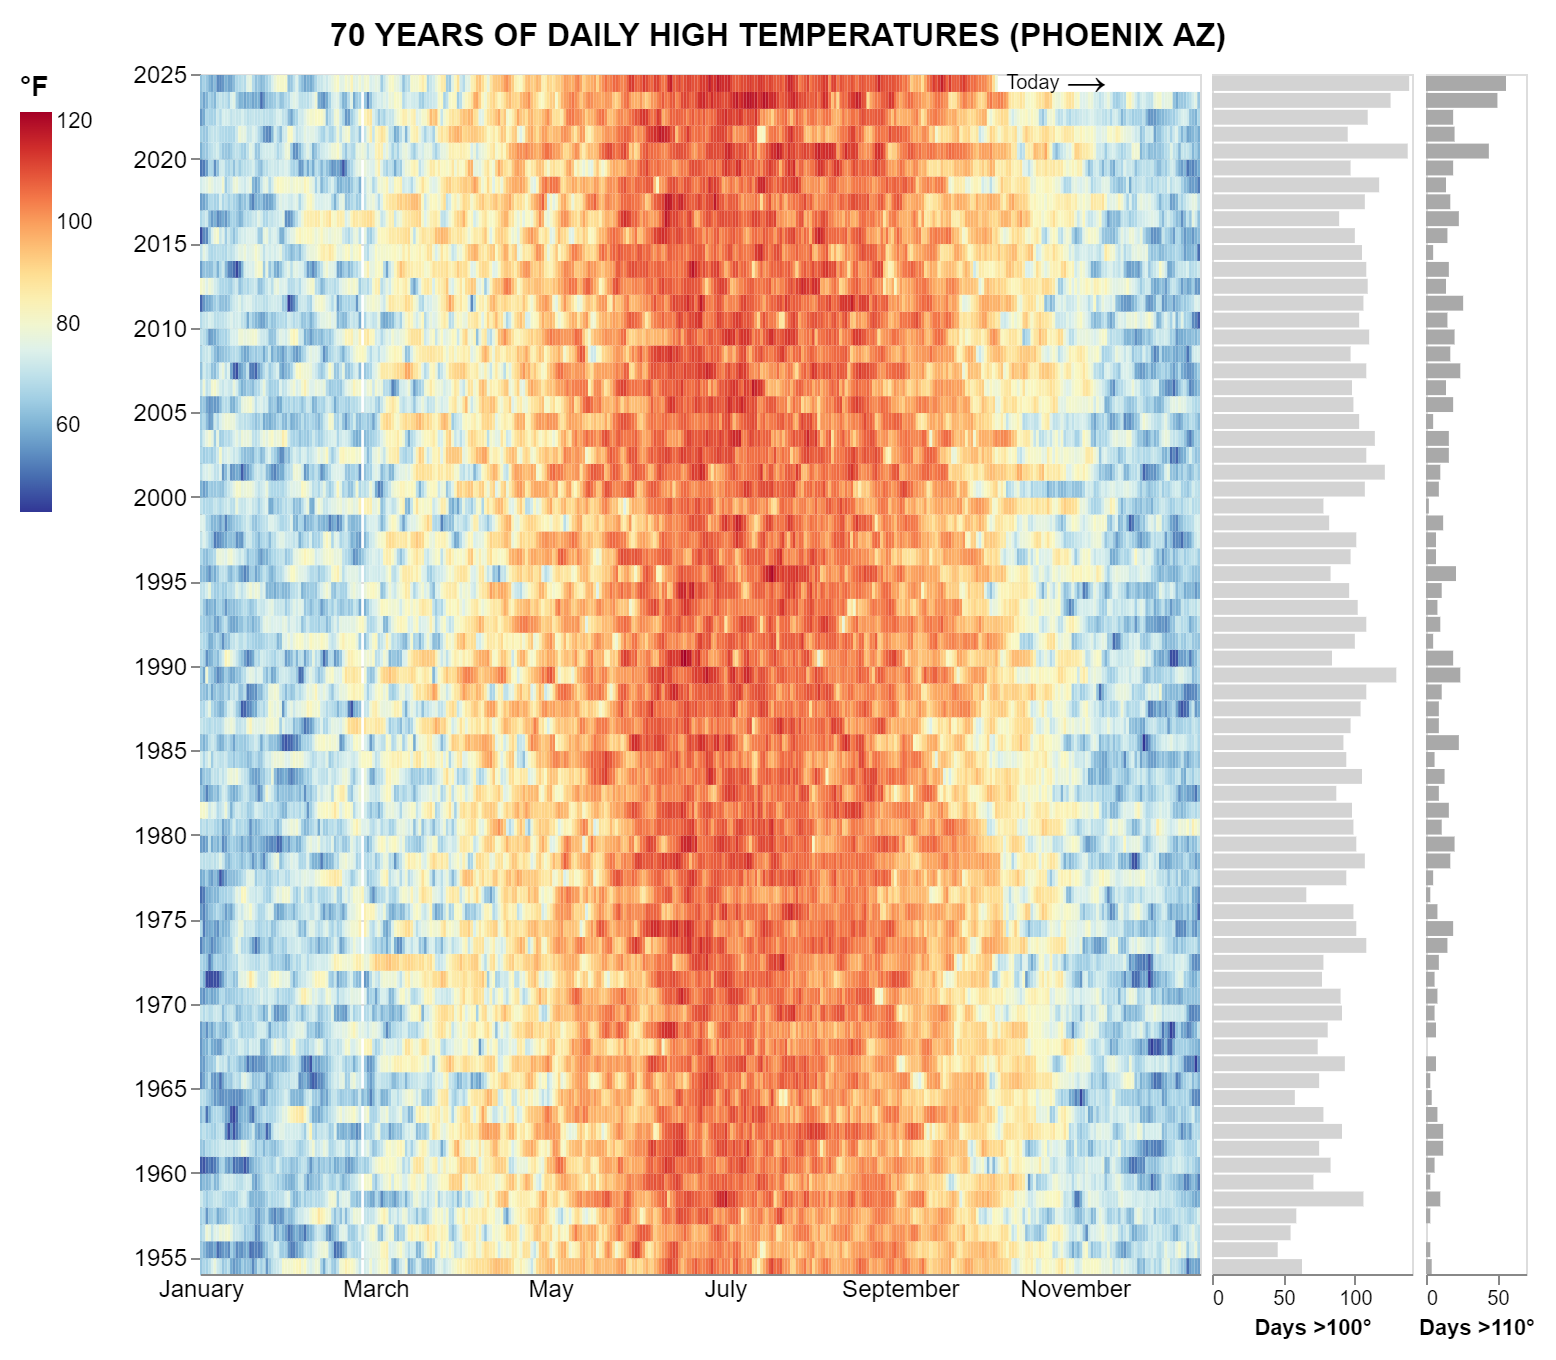

In [1]:
from IPython.display import Image
Image(filename='pxh_70_years_of_daily_high_tempertures.png')